## Install requirements and updating python version to 3.10
- or atleast up to the python version of the repo your decomposing

In [ ]:
!python --version

## Imports

In [4]:
import openai
import os
import inspect
import json
import scipy
import scipy.stats
import numpy as np
from bertopic import BERTopic

## OpenAI key

In [13]:
from getpass import getpass

openai_secret = getpass("Enter the secret value: ")
# Set up OpenAI API credentials
openai.api_key = openai_secret

Enter the secret value: ··········


## Download Repo of interest

In [ ]:
%%capture
%%bash
git clone https://github.com/danijar/dreamerv3

In [6]:
%%capture
%%bash
git clone https://github.com/danielpatrickhug/GitModel.git

In [ ]:
%%capture
%%bash
git clone https://github.com/SPOCKnots/pyknotid

In [ ]:
%%capture
%%bash
git clone https://github.com/lab-v2/pyreason.git

In [ ]:
%%capture
%%bash
git clone https://github.com/deepmind/clrs.git

In [ ]:
%%capture
%%bash
git clone https://github.com/HazyResearch/safari

## Parse Repo Dir and extract Imports, Globals, Classes(methods), Functions

In [5]:
import os
import ast
from ast_parsers.python_ast_parser import parse_python_file, get_methods, parse_github_repo
from system_prompts.format_system_prompts import format_system_prompts, format_system_prompts_with_tree
from models.transformers.chatgpt_api_inference import process_transcript

ModuleNotFoundError: No module named 'ast_parsers'

## Assistant Tasks

## Inference

ModuleNotFoundError: No module named 'models'

In [42]:
topic_tree = """
.
├─Enum-like classes to define problem classes and data types in a neural network____
│    ├─■──Understanding `Stage` and `OutputClass` classes in Python for problem stages and output class differ ── Topic: 13
│    └─■──Enum-like classes in Python: Location and Type.____ ── Topic: 12
└─NetChunked message passing for time-chunked data____
     ├─Documented code for a model with selectable message passing algorithm using time-chunked data____
     │    ├─Understanding the CLRSDataset in TensorFlow Datasets (TFDS)____
     │    │    ├─■──CLRS dataset downloading and GCP URL retrieval____ ── Topic: 21
     │    │    └─"TFDS CLRSDataset with chunked data and preprocessing"____
     │    │         ├─■──TensorFlow Datasets (TFDS) CLRS30_v Dataset and Chunking____ ── Topic: 4
     │    │         └─■──Understanding _build_default_builder_configs function for building default configurations for the CL ── Topic: 10
     │    └─Python functions and classes for machine learning models and data processing.____
     │         ├─Message Passing Algorithm for Time-Chunked Sequential Data Training.____
     │         │    ├─Python coding for neural networks and message passing graph algorithms____
     │         │    │    ├─Function to evaluate hint predictions using input data and output scores____
     │         │    │    │    ├─■──Mask evaluation with F1 score and class imbalance protection.____ ── Topic: 16
     │         │    │    │    └─■──Python function for evaluating hint predictions using input data and returning dictionary of evaluat ── Topic: 8
     │         │    │    └─Postprocessing, Model Implementation, and Hint Loss Calculation for Machine Learning Models____
     │         │    │         ├─Machine learning models and loss functions____
     │         │    │         │    ├─■──Hint Trajectory Batching____ ── Topic: 15
     │         │    │         │    └─Graph-based model implementation with time-chunked data processing____
     │         │    │         │         ├─Neural networks for time-chunked data with hint loss computation.____
     │         │    │         │         │    ├─■──Understanding the _copy_hint function and assertions in a data preprocessing algorithm.____ ── Topic: 11
     │         │    │         │         │    └─Neural net models with message passing algorithm and chunked data processing____
     │         │    │         │         │         ├─■──Sinkhorn operator in log space for permutation pointer postprocessing.____ ── Topic: 1
     │         │    │         │         │         └─■──Neural network models for graph-based data processing.____ ── Topic: 0
     │         │    │         │         └─■──Understanding and Implementing Hash Table Probing with Strings Pair, Strings Pi, and Strings Positio ── Topic: 3
     │         │    │         └─Postprocessing with Sinkhorn Operator____
     │         │    │              ├─Postprocessing with Sinkhorn Operator____
     │         │    │              │    ├─■──Understanding the _is_not_done_broadcast function for tensor manipulation in JAX.____ ── Topic: 5
     │         │    │              │    └─■──Postprocessing with Sinkhorn operator____ ── Topic: 6
     │         │    │              └─■──Encoders initialization and construction with XAVIER_ON_SCALARS method.____ ── Topic: 18
     │         │    └─Gradient filtering in JAX with pmap and optimizer updates____
     │         │         ├─■──JAX pmap computation and reshaping of Pytrees for multiple devices.____ ── Topic: 2
     │         │         └─■──Gradient Filtering and Optimization Updates in Neural Networks____ ── Topic: 14
     │         └─Processor Factory Implementation____
     │              ├─Function for creating a processor factory with various options (e.g. attention, GAT, embeddings) inc
     │              │    ├─■──Functions for creating processing factories with various configurations for machine learning models. ── Topic: 7
     │              │    └─■──Graph Sampling and Shortest Paths for DAGs____ ── Topic: 17
     │              └─■──Strongly Connected Components using Kosaraju's Algorithm in Python____ ── Topic: 20
     └─Parsing DataPoint objects from ProbesDict by stage____
          ├─■──Document analysis of a Python function for splitting contents of a dictionary into lists of DataPoin ── Topic: 9
          └─■──Understanding the push and finalize functions in probing.py for managing ProbesDict.____ ── Topic: 19

"""

In [65]:
git_repo_path = "/content/GitModel"
out_path = "/content/gitmodel_sum"
name_id = "gitmodel"
contents = parse_github_repo(git_repo_path)
print(len(contents))
pruned_contents = []
for cont in contents:
    fp = cont["file_name"]
    fn = fp.split("/")[-1]
    fn_ = fn.split(".")[0]
    if fn_ in ["__init__"] or fn_.split("_")[-1] in ["test"]:
        continue
    else:
        print(cont["file_name"])
        pruned_contents.append(cont)

9
/content/GitModel/src/memory_tree_generation.py
/content/GitModel/src/repo_graph_generation.py
/content/GitModel/src/ast_parsers/python_ast_parser.py


In [66]:
from ..repo_graph_generation import decompose_repo


decompose_repo()

file_name: /content/GitModel/src/memory_tree_generation.py
Imports: ['from bertopic import BERTopic', 'from bertopic.representation import OpenAI', 'from bertopic.vectorizers import ClassTfidfTransformer', 'from sentence_transformers import SentenceTransformer', 'from sklearn.feature_extraction.text import CountVectorizer']
functions: ['def load_topic_model(diversity=0.1, min_topic_size=10, nr_topics="auto", model_name="all-MiniLM-L6-v2"):\n    vectorizer_model = CountVectorizer(stop_words="english")\n    ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)\n    representation_model = OpenAI(model="gpt-3.5-turbo", delay_in_seconds=1, chat=True)\n    model = SentenceTransformer(model_name)\n    topic_model = BERTopic(\n        nr_topics=nr_topics,\n        min_topic_size=min_topic_size,\n        representation_model=representation_model,\n        vectorizer_model=vectorizer_model,\n        ctfidf_model=ctfidf_model,\n        embedding_model=model,\n    )\n    return topic_mo

KeyboardInterrupt: ignored

## Topic Modeling

In [15]:
from sentence_transformers import SentenceTransformer

import math
import pandas as pd
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from tqdm import tqdm
import torch
from torch import Tensor
from collections import defaultdict
from typing import List

In [67]:
def load_jsonl(filepaths):
    data = []
    for filepath in filepaths:
        with open(filepath, "r") as f:
            for line in f:
                data.append(json.loads(line))
    return data


root_dir = "/content/gitmodel_sum"
repo = "gitmodel"
repo_files = [
    f"{root_dir}/{repo}_summary.jsonl",
    f"{root_dir}/{repo}_question_asking.jsonl",
    f"{root_dir}/{repo}_summary2.jsonl",
    f"{root_dir}/{repo}_summary3.jsonl",
]  # , f"{root_dir}/{repo}_complement_code.jsonl", f"{root_dir}/{repo}_code_suggestions.jsonl"]#, f'{root_dir}/{repo}_todo_labeler.jsonl', f"{root_dir}/{repo}_bug_finder.jsonl"]

res = load_jsonl(repo_files)
sents = []
for r in res:
    messages = r["conversation_history"]
    reply = r["assistant_reply"]
    sents.append(reply)
    sents.append(messages[-2]["content"])

In [68]:
data = pd.DataFrame(sents, columns=["query"])
data["_id"] = data.index

In [69]:
data

,query,_id
0,The `memory_tree_generation.py` file in the `G...,0
1,"```def load_topic_model(diversity=0.1, min_top...",1
2,The `fit_topic_model` function takes in a BERT...,2
3,"```def fit_topic_model(topic_model, data, embe...",3
4,The `get_topic_info` function takes in a BERTo...,4
...,...,...
351,"```def process_transcript(segments, file_name,...",351
352,The `get_repo_contents` function takes in a `g...,352
353,```def get_repo_contents(git_repo_path):\n ...,353
354,The `decompose_repo` function takes in a list ...,354


In [70]:
from ..models.graph_networks.kernels import compute_cos_sim_kernel, graph_laplacian, compute_kernel
from ..models.graph_networks.message_passing import k_hop_message_passing_sparse
from ..models.transformers.sentence_embeddings import embed_data
from ..models.topic_modeling.umap_hdbscan_pipeline import (
    load_topic_model,
    get_topic_model,
    get_representative_docs,
    reduce_outliers,
    fit_topic_model,
    compute_hierarchical_topic_tree,
    get_topic_info,
)


import matplotlib.pyplot as plt

use svd to tune threshold

In [71]:
MODEL_NAME = "all-MiniLM-L6-v2"  # "allenai-specter"#
embs = embed_data(data, model_name=MODEL_NAME)
A = compute_cos_sim_kernel(embs, threshold=0.6)
A_k, agg_features = k_hop_message_passing_sparse(A, embs, 2)

Embedding data
Model loaded
Unique sentences 205


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embeddings computed


100%|██████████| 2/2 [00:00<00:00, 36.63it/s]


U: (132, 132)

S: (132,)

VT: (132, 132)



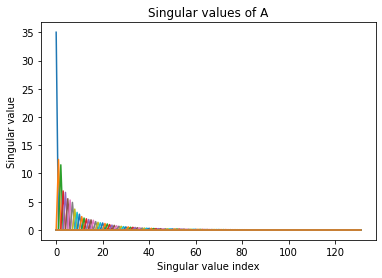

In [22]:
U, S, VT = np.linalg.svd(compute_kernel(embs))
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of A")
plt.show()

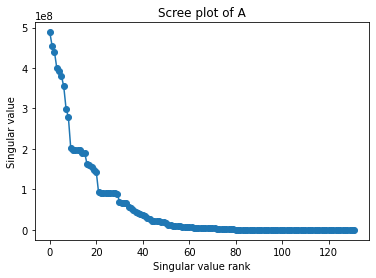

In [52]:
# Sort the singular values in descending order
s = S

# Plot the scree plot
plt.plot(S, "o-")
plt.xlabel("Singular value rank")
plt.ylabel("Singular value")
plt.title("Scree plot of A")
plt.show()

U: (264, 264)

S: (264,)

VT: (264, 264)



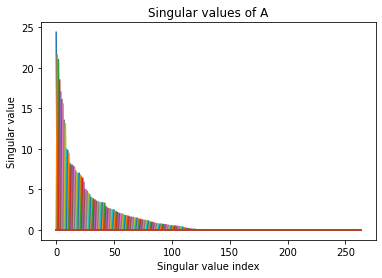

In [56]:
U, S, VT = np.linalg.svd(A)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of A")
plt.show()

U: (356, 356)

S: (356,)

VT: (356, 356)



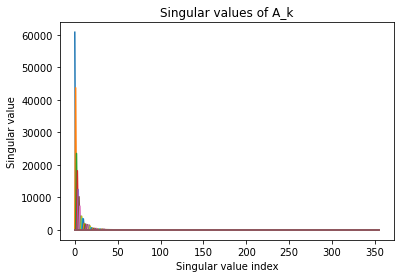

In [72]:
U, S, VT = np.linalg.svd(A_k)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of A_k")
plt.show()

In [58]:
L, D = graph_laplacian(A)
L_k, D_k = graph_laplacian(A_k)

U: (132, 132)

S: (132,)

VT: (132, 132)



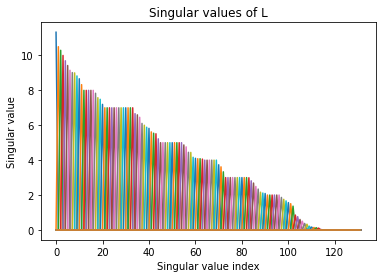

In [27]:
U, S, VT = np.linalg.svd(L)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of L")
plt.show()

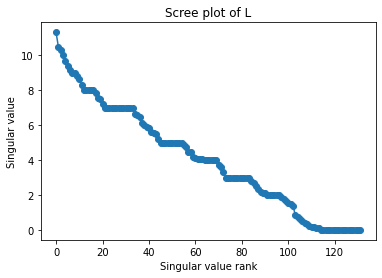

In [28]:
# Plot the scree plot
plt.plot(S, "o-")
plt.xlabel("Singular value rank")
plt.ylabel("Singular value")
plt.title("Scree plot of L")
plt.show()

Singular values of graph laplacian 

U: (132, 132)

S: (132,)

VT: (132, 132)



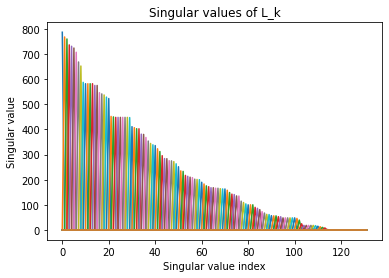

In [29]:
U, S, VT = np.linalg.svd(L_k)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of L_k")
plt.show()

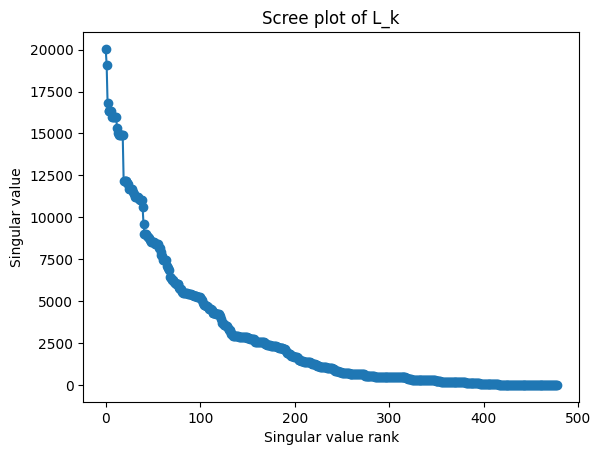

In [ ]:
# Plot the scree plot
plt.plot(S, "o-")
plt.xlabel("Singular value rank")
plt.ylabel("Singular value")
plt.title("Scree plot of L_k")
plt.show()

In [ ]:
D

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 11.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  6.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 13.]])

In [ ]:
diagonal_sum = np.trace(D)
diagonal_sum

89346.0

In [ ]:
D_k

array([[ 393.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 1707.,    0., ...,    0.,    0.,    0.],
       [   0.,    0., 4097., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., 4895.,    0.,    0.],
       [   0.,    0.,    0., ...,    0., 1203.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., 2779.]])

In [ ]:
diagonal_sum_k = np.trace(D_k)
diagonal_sum_k

787227280.0

100%|██████████| 2/2 [00:00<00:00, 326.58it/s]


U: (132, 132)

S: (132,)

VT: (132, 132)



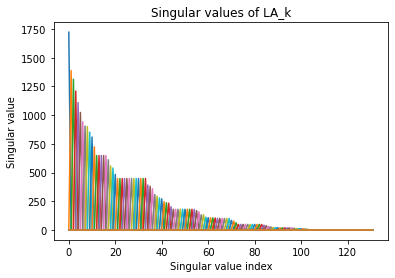

In [30]:
LA, agg_features = k_hop_message_passing_sparse(L, embs, 2)
U, S, VT = np.linalg.svd(LA)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of LA_k")
plt.show()

100%|██████████| 2/2 [00:00<00:00, 126.31it/s]


U: (132, 132)

S: (132,)

VT: (132, 132)



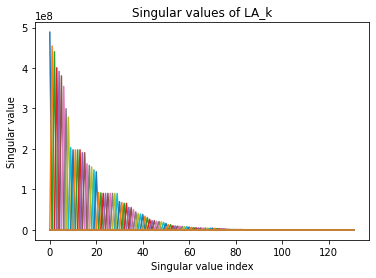

In [31]:
LA_k, agg_features = k_hop_message_passing_sparse(L_k, agg_features, 2)
U, S, VT = np.linalg.svd(LA_k)
print(f"U: {U.shape}\n")
print(f"S: {S.shape}\n")
print(f"VT: {VT.shape}\n")
plt.plot(np.diag(S))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Singular values of LA_k")
plt.show()

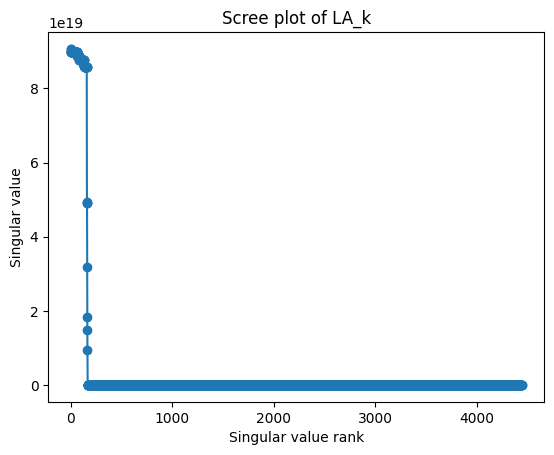

In [ ]:
# Plot the scree plot
plt.plot(S, "o-")
plt.xlabel("Singular value rank")
plt.ylabel("Singular value")
plt.title("Scree plot of LA_k")
plt.show()

In [ ]:
diagonal_sum_k = np.trace(LA_k)
diagonal_sum_k

1.4274055072769385e+22

In [76]:
topic_model = load_topic_model(nr_topics="auto")
topics, probs = fit_topic_model(topic_model, data, agg_features)
freq = get_topic_info(topic_model)
rep_docs = topic_model
freq

,Topic,Count,Name
0,-1,44,-1_k-hop message passing with sparse matrices ...
1,0,155,0_Document pruning and adjacency matrix comput...
2,1,54,1_Issues with formatting system prompts in a f...
3,2,27,2_Data summarization using ChatGPT on code rep...
4,3,23,3_Graph Laplacian with Pairwise Distances___
5,4,16,4_Database Migrations with SQLAlchemy and Alem...
6,5,14,5_parsing Python files with AST and extracting...
7,6,12,6_Using the OpenAI GPT-3.5-Turbo model to gene...
8,7,11,7_Probability Density Estimation using Gaussia...


In [78]:
topic_model, new_topics = reduce_outliers(topic_model, data, topics, probs)

In [79]:
freq = get_topic_info(topic_model)
freq

,Topic,Count,Name
0,-1,4,-1_Creating a Settings class using BaseSetting...
1,0,155,0_Document pruning and Gaussian kernel computa...
2,1,65,1_Parsing and Decomposing Contents of a Git Re...
3,2,42,2_Codebase Summary and Conversation Template G...
4,3,33,3_Computing k-hop adjacency matrix and aggrega...
5,4,16,4_Understanding database migrations in offline...
6,5,18,5_Parsing Python code using abstract syntax tr...
7,6,12,6_Using OpenAI GPT-3.5-Turbo model for chat re...
8,7,11,7_Probability density estimation of distance s...


In [80]:
hr, tree = compute_hierarchical_topic_tree(topic_model=topic_model, data=data)

100%|██████████| 7/7 [00:15<00:00,  2.27s/it]


In [ ]:
topic_model.visualize_hierarchical_documents(
    data["query"].to_list(), hr, embeddings=agg_features, hide_document_hover=True
)

In [ ]:
rep_docs[19]

A

In [81]:
print(tree)

.
├─■──Parsing Python code using abstract syntax trees (AST) and extracting methods____ ── Topic: 5
└─Repository graph generation and topic modeling using embeddings, adjacency lists, and hierarchical t
     ├─Functions for formatting system prompts and decomposing repositories in ChatGPT-based conversational
     │    ├─■──Understanding database migrations in offline and online mode using SQLAlchemy and Alembic____ ── Topic: 4
     │    └─Functions and System Prompts for Code Repositories and ChatGPT____
     │         ├─Documenting GitHub Repositories with ChatGPT____
     │         │    ├─■──Parsing and Decomposing Contents of a Git Repository in Python____ ── Topic: 1
     │         │    └─■──Codebase Summary and Conversation Template Generation with System Prompts for ChatGPT____ ── Topic: 2
     │         └─■──Using OpenAI GPT-3.5-Turbo model for chat response generation in Python____ ── Topic: 6
     └─Document pruning and Gaussian kernel computation using PyTorch in a topic mod

In [ ]:
print(tree)

.
├─Enum-like classes to define problem classes and data types in a neural network____
│    ├─■──Understanding `Stage` and `OutputClass` classes in Python for problem stages and output class differ ── Topic: 13
│    └─■──Enum-like classes in Python: Location and Type.____ ── Topic: 12
└─NetChunked message passing for time-chunked data____
     ├─Documented code for a model with selectable message passing algorithm using time-chunked data____
     │    ├─Understanding the CLRSDataset in TensorFlow Datasets (TFDS)____
     │    │    ├─■──CLRS dataset downloading and GCP URL retrieval____ ── Topic: 21
     │    │    └─"TFDS CLRSDataset with chunked data and preprocessing"____
     │    │         ├─■──TensorFlow Datasets (TFDS) CLRS30_v Dataset and Chunking____ ── Topic: 4
     │    │         └─■──Understanding _build_default_builder_configs function for building default configurations for the CL ── Topic: 10
     │    └─Python functions and classes for machine learning models and data pro

In [ ]:
print(tree)

.
├─Purpose and Attributes of the `Net` Class in Graph Neural Networks____
│    ├─Graph Attention Networks and DAG Shortest Paths in JAX.____
│    │    ├─Graph Attention Networks (GAT and GATv2) code implementation____
│    │    │    ├─Code for DAG shortest path and depth-first search algorithms____
│    │    │    │    ├─■──String Matching and Maximum Subarray____ ── Topic: 10
│    │    │    │    └─Depth-First Search and DAG Shortest Path Algorithms implemented in Python____
│    │    │    │         ├─■──Description of string probe functions in probing.py file for Hash Table probing.____ ── Topic: 1
│    │    │    │         └─Graph Algorithms - DFS and DAG Shortest Paths____
│    │    │    │              ├─■──Graph algorithms (DFS and DAG shortest path) in Python____ ── Topic: 0
│    │    │    │              └─■──Functions for decoding diff and graph features in PyTorch graph neural networks.____ ── Topic: 6
│    │    │    └─■──Graph Attention Networks (GAT and GATv2)____ ── Topic: 20


In [ ]:
False + False

0

In [ ]:
True + True

2

In [ ]:
print(tree)

A_k

In [ ]:
sum(True, True)

TypeError: ignored

In [ ]:
print(tree)

.
├─JAX Pytree Reshaping and Loss Calculation for Time-Chunked Training____
│    ├─JAX pmap functions and reshaping pytrees for parallel computation____
│    │    ├─JAX pmap functions for reshaping and restacking arrays and pytrees____
│    │    │    ├─■──JAX pmap computation functions (_maybe_pmap_data, _restack_from_pmap, _maybe_restack_from_pmap, and  ── Topic: 5
│    │    │    └─■──Functions and algorithms for text matching and reshaping pytrees for parallel processing.____ ── Topic: 6
│    │    └─■──Broadcasting boolean tensor to match shape of input tensor____ ── Topic: 11
│    └─Functions for Output Loss Calculation in Neural Networks____
│         ├─■──Loss calculation functions with scalar and time-chunked training data.____ ── Topic: 9
│         └─■──Evaluation of output predictions using `evaluate` function in a codebase____ ── Topic: 7
└─Understanding the Net class and its attributes for message passing in graph neural networks____
     ├─Graph Neural Network Architecture a

In [ ]:
print(tree)

.
├─DFS and DAG Shortest Paths Algorithm Implementation with Probing____
│    ├─■──Bipartite matching-based flow networks____ ── Topic: 34
│    └─Search and Shortest Path Algorithms____
│         ├─DAG shortest path algorithm with probing and initialization____
│         │    ├─■──Strongly Connected Components Algorithm with Kosaraju's Implementation____ ── Topic: 37
│         │    └─Graph Sampling and DAG Shortest Path Algorithm____
│         │         ├─■──Bipartite matching using Edmonds-Karp algorithm____ ── Topic: 18
│         │         └─■──Random graph generation using Bellman-Ford algorithm in Python____ ── Topic: 0
│         └─Graham scan convex hull algorithm implementation in Python____
│              ├─■──Maximum subarray algorithm implementation____ ── Topic: 6
│              └─■──Graham scan convex hull algorithm implementation____ ── Topic: 12
└─Postprocessing Decoder Output for Chunked Data Processing Net____
     ├─Postprocessing Decoder Output with Chunked Data in JAX

In [ ]:
with open(f"/content/tree_clrs.txt", "w", encoding="utf-8") as f:
    f.write(tree)

**LA** message passing

In [ ]:
print(tree)

.
├─Code Snippet with No TODO Tasks and Plotting Libraries____
│    ├─code snippet analysis for TODO tasks____
│    │    ├─■──No TODO tasks in provided code snippet____ ── Topic: 12
│    │    └─■──Analysis of Runtime and Data Representations Using Axis and Seaborn Plots in Python Code____ ── Topic: 4
│    └─■──Python script for generating a line plot of program runtime vs. number of nodes using Seaborn and Ma ── Topic: 9
└─Python function for updating nodes and edges in a graph.____
     ├─Python implementation of rule inference algorithm with Numba and fact propagation.____
     │    ├─Updating Nodes in a Graph with Rule Traces and Atom Traces.____
     │    │    ├─■──Function for Updating Node State in a Rule Trace Graph.____ ── Topic: 8
     │    │    └─■──Numba-based interpretation of labeled graphs with empty lists and inconsistent labels____ ── Topic: 6
     │    └─Python API and Fact Value Types Implementation____
     │         ├─Python API usage for boxing and unboxing values 

LA_k message passing

In [ ]:
print(tree)

.
├─Updating Interpretations Graph with Nodes and Edges____
│    ├─Analysis of Python code implementing a graph data structure and functions to add nodes and edges, us
│    │    ├─■──Code Refactoring and Commenting, Handling None Values in Python Code____ ── Topic: 10
│    │    └─Code analysis and review of a function for adding edges and nodes to a graph, including checking for
│    │         ├─■──Positive aspects of a codebase with clear and descriptive function names and variable names.____ ── Topic: 4
│    │         └─■──Methods for adding edges to a graph with considerations for existing nodes and labels.____ ── Topic: 11
│    └─Updating nodes and edges in a graph with rule trace and atom trace, using Numba for optimization____
│         ├─Python functions for updating rule traces with graph attributes____
│         │    ├─■──Updating nodes with rules and traces in a converging system.____ ── Topic: 15
│         │    └─■──Interpretation of Graph Labels Using Numba in Python____ ──